# <b> Final Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

#Increase display resolution
mpl.rcParams['figure.dpi'] = 200

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
#prevents lines from being jagged
mpl.rcParams['lines.antialiased'] = True

#
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5

#I have no idea what this does
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1

mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
#defines the colors to cycle through when line colors are not specifically defined
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'DejaVu Serif'
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.labelpad'] = 9.0

# Title
mpl.rcParams['axes.titlepad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22

#default in mpl v2.0 is 'out'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.minor.visible'] = True

#Error bar plots
#default in mpl v2.0 is no caps on error bars
mpl.rcParams['errorbar.capsize'] = 3

# Legend
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation

# Figure size
mpl.rcParams['figure.figsize'] = 12, 8

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams['savefig.dpi'] = 200 #higher-res than default 100 dpi

In [13]:
from scipy.odr import *

In [16]:
concentrations = np.array([0.195, 0.0966, 0.0504, 0.0258, 0.01406, 0.0062])
uncertainities_concentrations = np.array([0.0202, 0.0201, 0.0200, 0.0200, 0.0200, 0.0200])

t1_analysis = np.array([5.37, 10.418, 22.138, 37.059, 59.569, 138.984])
uncertainties_t1_analysis = np.array([0.035473, 0.10732, 0.12753, 0.53901, 1.3241, 1.5123])





In [22]:
def f(beta, x):
    a, b = beta  # Extract parameters from the beta array
    return a * x + b

model = Model(f)
data = RealData(np.log(concentrations), np.log(t1_analysis), sx=uncertainities_concentrations, sy=uncertainties_t1_analysis)

odr = ODR(data, model, beta0=[-1, 5])
out = odr.run()

x_fit = np.linspace(np.log(concentrations[0]), np.log(concentrations[-1]), 100)
y_fit = f(out.beta, x_fit)  

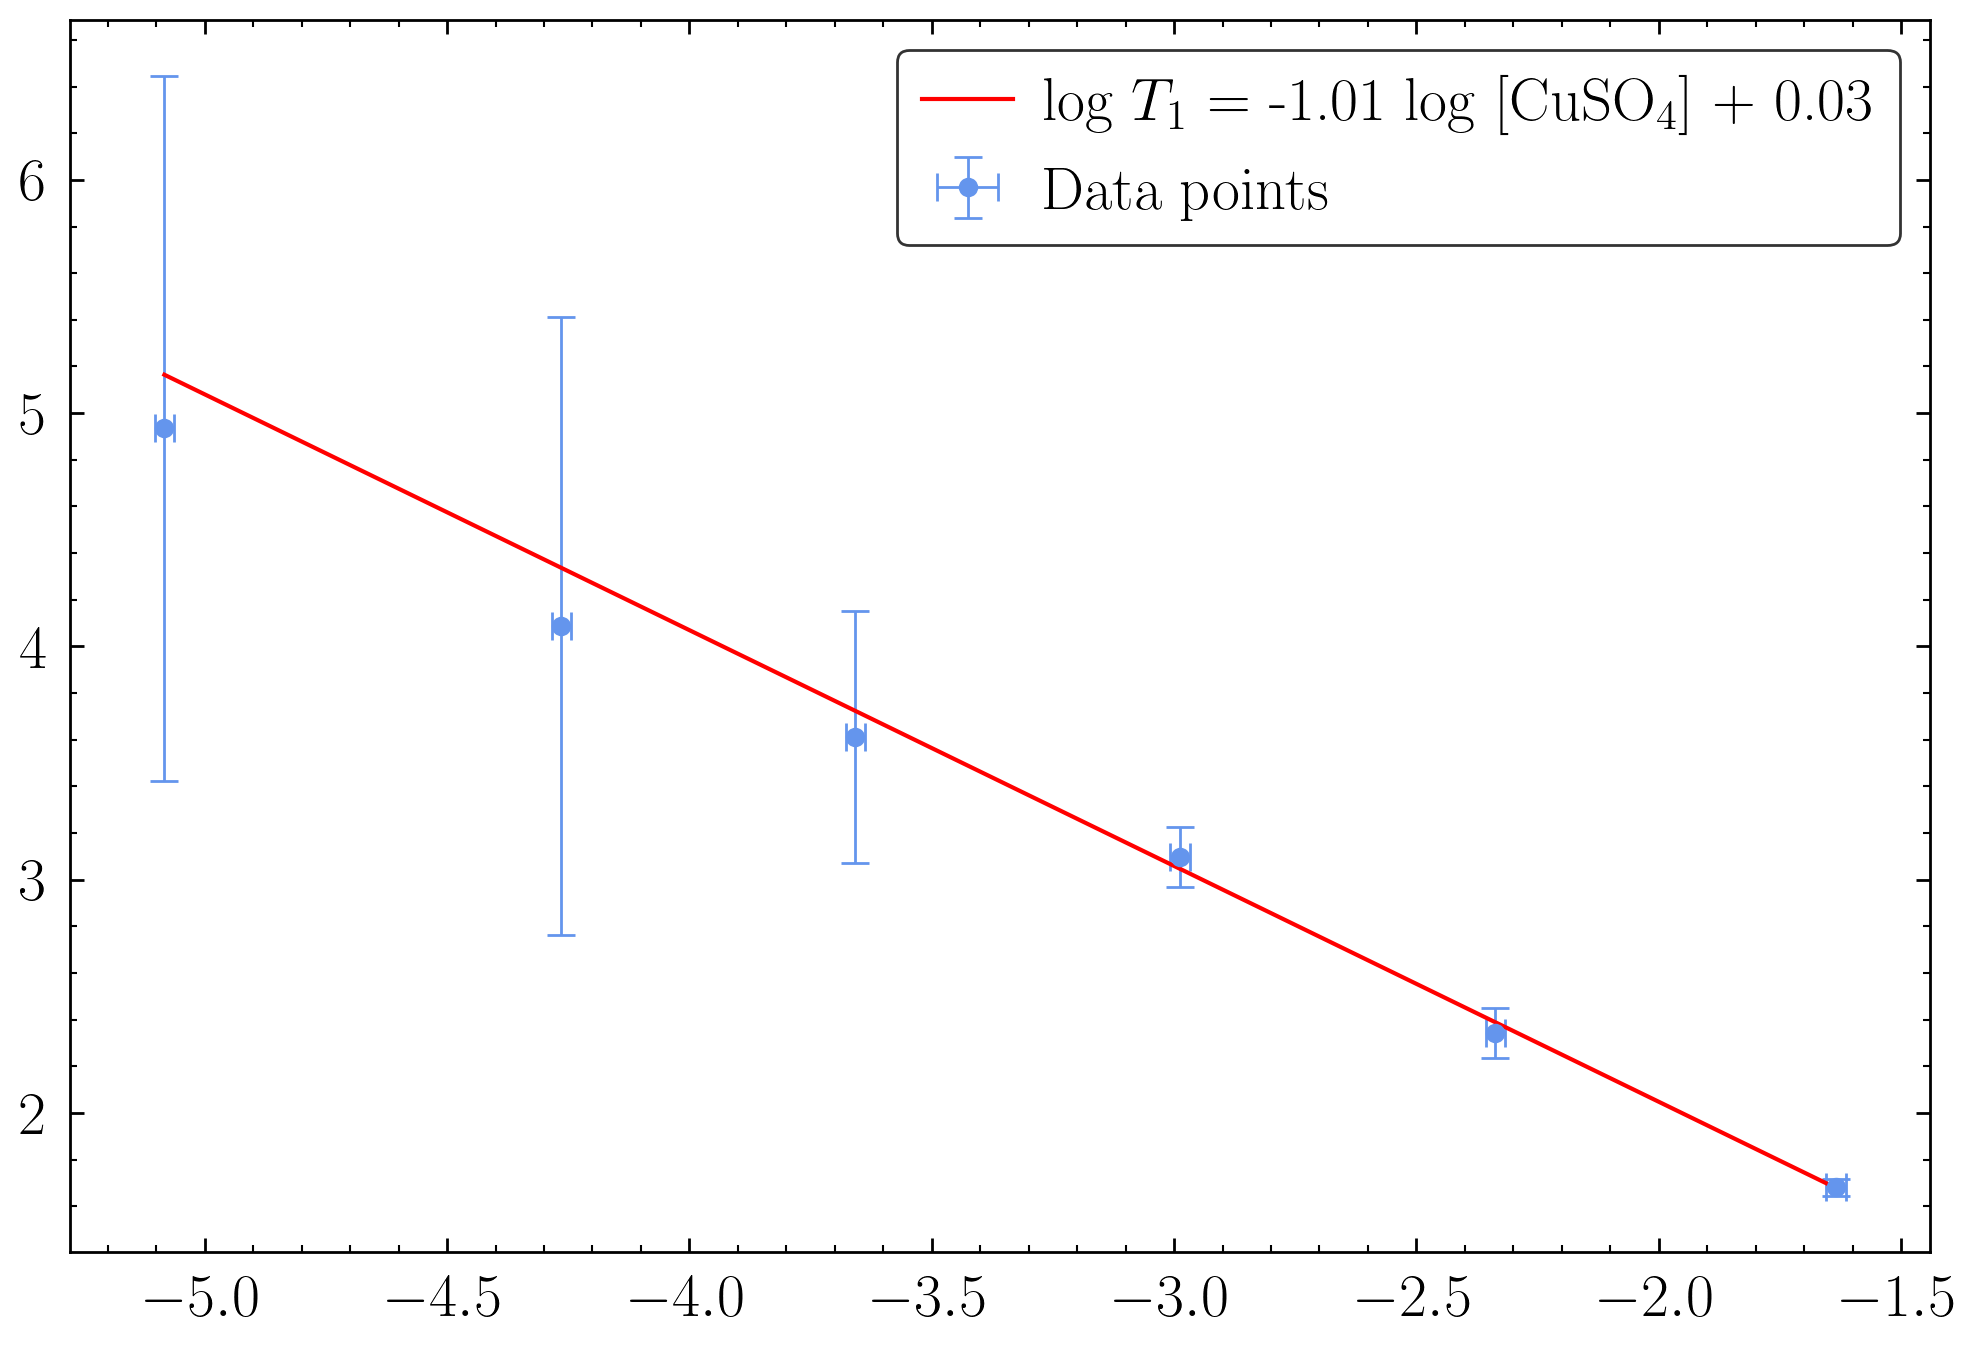

In [31]:
plt.errorbar(np.log(concentrations), np.log(t1_analysis), xerr=uncertainities_concentrations, yerr=uncertainties_t1_analysis, fmt='o', label='Data points', capsize=5, elinewidth=1, markeredgewidth=1)
plt.plot(x_fit, y_fit, 'r-', label=r'log $T_1$ = {:.2f} log [CuSO$_4$] + {:.2f}'.format(out.beta[0],  out.beta[1]))
plt.legend()

<ErrorbarContainer object of 3 artists>

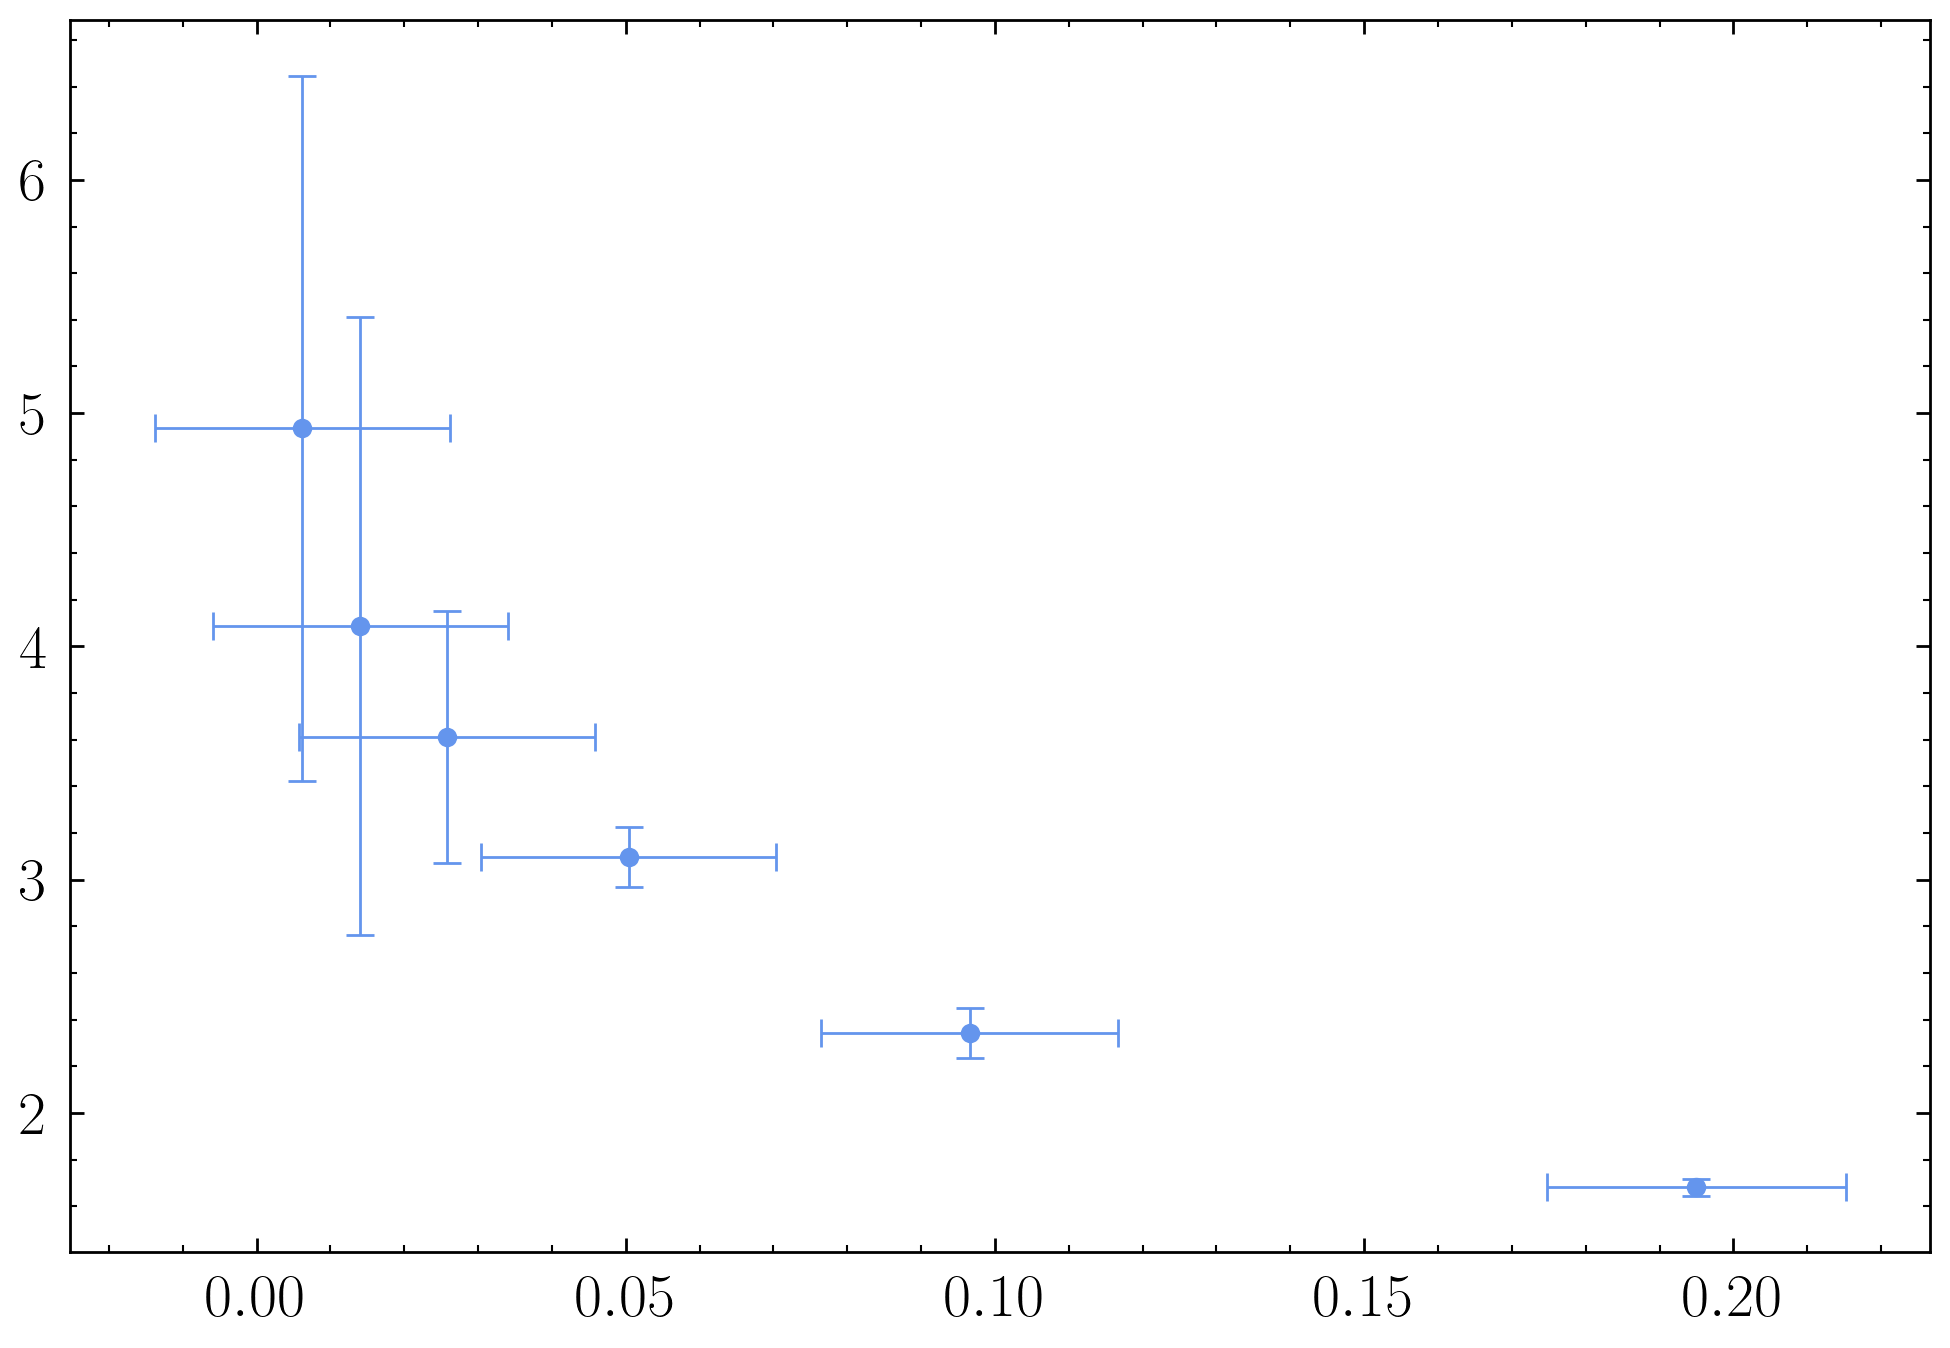

In [9]:
plt.errorbar(concentrations, np.log(t1_analysis), xerr=uncertainities_concentrations, yerr=(uncertainties_t1_analysis), fmt='o', label='Data points', capsize=5, elinewidth=1, markeredgewidth=1)
